# Sonora

Después de haber trabajado con México, vamos a seguir con el estado de Sonora. 

In [27]:
import os
import zipfile

mexico_data = "..\\medium_data\\mexico_data"

folder_path = mexico_data + '\\Sonora'
try:
    os.mkdir(folder_path)
except:
    print('Hubo un detalle')


with zipfile.ZipFile(mexico_data + '\\26_sonora.zip', 'r') as cvegeo:
    cvegeo.extractall(folder_path)

sonora_list = os.listdir(folder_path + "\\conjunto_de_datos")
sonora_list


Hubo un detalle


['26a.cpg',
 '26a.dbf',
 '26a.prj',
 '26a.shp',
 '26a.shx',
 '26ar.cpg',
 '26ar.dbf',
 '26ar.prj',
 '26ar.shp',
 '26ar.shx',
 '26cd.cpg',
 '26cd.dbf',
 '26cd.prj',
 '26cd.shp',
 '26cd.shx',
 '26e.cpg',
 '26e.dbf',
 '26e.prj',
 '26e.shp',
 '26e.shx',
 '26ent.cpg',
 '26ent.dbf',
 '26ent.prj',
 '26ent.shp',
 '26ent.shx',
 '26fm.cpg',
 '26fm.dbf',
 '26fm.prj',
 '26fm.shp',
 '26fm.shx',
 '26l.cpg',
 '26l.dbf',
 '26l.prj',
 '26l.shp',
 '26l.shx',
 '26lpr.cpg',
 '26lpr.dbf',
 '26lpr.prj',
 '26lpr.shp',
 '26lpr.shx',
 '26m.cpg',
 '26m.dbf',
 '26m.prj',
 '26m.shp',
 '26m.shx',
 '26mun.cpg',
 '26mun.dbf',
 '26mun.prj',
 '26mun.shp',
 '26mun.shx',
 '26pe.cpg',
 '26pe.dbf',
 '26pe.prj',
 '26pe.shp',
 '26pe.shx',
 '26pem.cpg',
 '26pem.dbf',
 '26pem.prj',
 '26pem.shp',
 '26pem.shx',
 '26sia.cpg',
 '26sia.dbf',
 '26sia.prj',
 '26sia.shp',
 '26sia.shx',
 '26sil.cpg',
 '26sil.dbf',
 '26sil.prj',
 '26sil.shp',
 '26sil.shx',
 '26sip.cpg',
 '26sip.dbf',
 '26sip.prj',
 '26sip.shp',
 '26sip.shx',
 '26ti.cpg

Una vez tengamos los archivos de Sonora en su carpeta. Repetimos el proceso visto en México. 

In [28]:
import fiona
import geopandas as gpd

geo_path_base = "..\\medium_data\\mexico_data\\Sonora\\conjunto_de_datos"
geo_paths = []
for file in sonora_list:
    if file.endswith(".shp"):
        geo_paths.append(os.path.join(geo_path_base, file))


def cvegeo(shape):
    municipies = fiona.open(shape)
    df = gpd.GeoDataFrame.from_features([feature for feature in municipies])
    # Get the order of the fields in the Fiona Collection; add geometry to the end
    columns = list(municipies.meta["schema"]["properties"]) + ["geometry"]
    # Re-order columns in the correct order
    df = df[columns]
    return df

sonora_cvegeo = cvegeo(geo_paths[9])

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

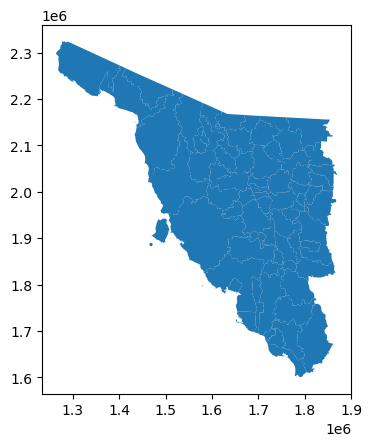

In [29]:
sonora = sonora_cvegeo.copy()
sonora.plot()

Ahora, vamos a darle un formato más comodo.

In [30]:
sonora['CVEGEO'] = sonora['CVEGEO'].astype(int)
sonora.set_index('CVEGEO',drop = True, inplace = True)
sonora.sort_index(inplace=True)
sonora

,CVE_ENT,CVE_MUN,NOMGEO,geometry
CVEGEO,,,,
26001,26,001,Aconchi,"POLYGON ((1716891.114 1996951.730, 1719444.516..."
26002,26,002,Agua Prieta,"POLYGON ((1760930.103 2160351.208, 1767001.040..."
26003,26,003,Álamos,"POLYGON ((1821256.173 1760798.494, 1821779.334..."
26004,26,004,Altar,"POLYGON ((1537545.873 2210751.842, 1540624.445..."
26005,26,005,Arivechi,"POLYGON ((1805489.050 1894518.539, 1808834.835..."
...,...,...,...,...
26068,26,068,Villa Pesqueira,"POLYGON ((1722816.055 1952950.532, 1725062.048..."
26069,26,069,Yécora,"POLYGON ((1803224.743 1856531.064, 1803220.789..."
26070,26,070,General Plutarco Elías Calles,"POLYGON ((1414999.834 2265826.465, 1417760.302..."


In [45]:
sonora = sonora[['NOMGEO','geometry']]

def sonora_codes(code: int|str):
    if type(code) == int:
        code = code % 72 + 1
        code += 26000 
        return sonora.loc[code, 'NOMGEO']
    Municipios = list(sonora['NOMGEO'])
    mun_id = Municipios.index(code)
    return mun_id

sonora_codes(1000)

'Tubutama'